In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

##ABSTRACT

Hoy en día, y desde siempre, las entidades bancarias se financian por medio de los créditos que otorgan a personas particulares o empresas. En principio como créditos que se solicitaban en el banco, y con el paso del tiempo aparecieron las tarjetas de crédito, las cuales se han mantenido en el tiempo y son utiles tanto para los bancos, como para los clientes. Se trata de una modalidad  de prestamos donde los gastos tienen un financiamiento fijo (en cuotas) o variable según el gasto y el pago mensual.

Una problemática importante es decidir a quien se le otorga este beneficio, en base a sus ingresos y sus gastos. Hay que predecir de alguna manera como le ira al cliente porque la idea principal es que siempre la use y siempre pague aunque sea el minimo para poder sumarle intereses.

El siguiente dataset presenta la información de una cantidad de personas que aplican para obtener una tarjeta de crédito. Esta información fue recopilada por un conocido banco de Estados Unidos para estudiar la posIbilidad de otorgamiento o no de una tarjeta de crédito. A continuación, se muestra la leyenda de las columnas


ID:	Número de cliente	
CODE_GENDER:	Genero	
FLAG_OWN_CAR:	Posee auto?
FLAG_OWN_REALTY:	Posee una propiedad?
CNT_CHILDREN:	Cantidad de hijos	
AMT_INCOME_TOTAL:	Ingreso anual	
NAME_INCOME_TYPE:	Tipo de ingreso	
NAME_EDUCATION_TYPE:	Nivel educativo	
NAME_FAMILY_STATUS:	Estado civil	
NAME_HOUSING_TYPE:	Tipo de vivienda
DAYS_BIRTH:	Cumpleaños contado hacia atrás desde el día de hoy, -1 significa el día de ayer
DAYS_EMPLOYED:	Días contados hacia atrás desde hoy hasya el día que inició su trasbajo. Si el número es positivo significa que está desempleado.
FLAG_MOBIL:	Posee teléfono celular?	
FLAG_WORK_PHONE:	Posee teléfono de trabajo	
FLAG_PHONE:	Posee teléfono en casa?	
FLAG_EMAIL:	Posee correo electrónico?
OCCUPATION_TYPE:	Ocupación
CNT_FAM_MEMBERS:	Tamaño de la familia	

##Objetivo General

Definimos un objetivo general el cual será; Seleccionar los clientes a los que se le puede aprobar un crédito para la compra de un automovil

##Objetivos especificos


*   Seleccionar el grupo de clientes de ingreso promedio
*   Seleccionar el grupo de ingresos con mayor responsabilidad familiar
*   Validar las hipotesis


Las variables a tener en cuenta son: si posee auto, una propiedad, el ingreso anual, tipo de ingreso, estado civil, tipo de vivienda, días trabajando y el tamaño de la familia.

En base a estas variables vamos a definir si aprobar o no el otorgamiento de una tarjeta de crédito al cliente



A continuación, procedemos con el análisis detallado de los datos suministrados.

In [194]:
df_tdc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/application_record.csv')
df_tdc.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [195]:
df_tdc.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [196]:
df_tdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [197]:
df_tdc.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Podemos ver que hay valores NaN para tipo de ocupación que representan el 30% de los registros.

Aún así, tomaremos en consideracióm el tipo de ocupación del cliente

In [198]:
df_tdc.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


Podemos observar que el ingreso anual promedio es de 187.524,3

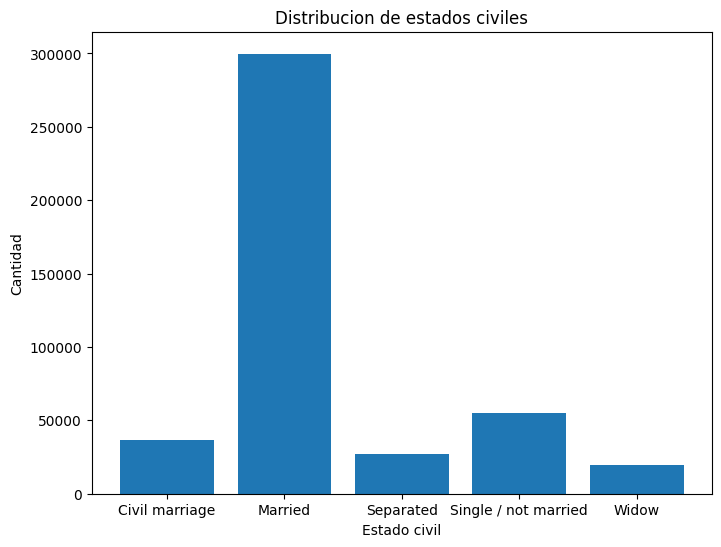

In [199]:
family_status = df_tdc.groupby('NAME_FAMILY_STATUS').size()
plt.figure(figsize=(8,6))
plt.bar(family_status.index, family_status.values)
plt.title('Distribucion de estados civiles')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad')
plt.show()

Se observa que en general, sin separar ningún grupo, la mayoría de los clientes están casados 

Text(0.5, 1.0, 'Ingreso por cantidad de hijos')

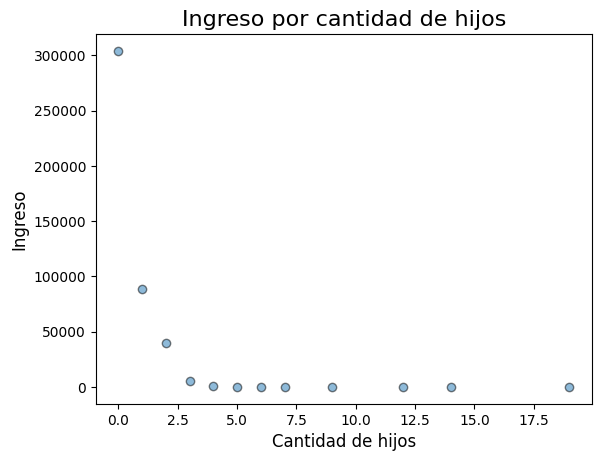

In [200]:
x = df_tdc.groupby('CNT_CHILDREN').size()
plt.scatter(x.index, x.values, edgecolor='k', alpha=0.5)
plt.ylabel('Ingreso', fontsize=12)
plt.xlabel('Cantidad de hijos', fontsize=12)
plt.title('Ingreso por cantidad de hijos', fontsize=16)

Se observa también que mientras menos hijos se tienen, mayor es el ingreso anual entre los clientes

In [201]:
df_tdc['DAYS_EMPLOYED'].abs()

0           4542
1           4542
2           1134
3           3051
4           3051
           ...  
438552    365243
438553      3007
438554       372
438555    365243
438556      1201
Name: DAYS_EMPLOYED, Length: 438557, dtype: int64

In [202]:
cant_tipo_ing = df_tdc['NAME_INCOME_TYPE'].value_counts()
cant_tipo_ing

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

El tipo de ingreso principal es working, por lo tanto vamos a tomar este como el atributo principal

In [203]:
tipo_ing = cant_tipo_ing.index
tipo_ing

Index(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'],
      dtype='object')

Text(0.5, 0, 'Tipo de ingreso')

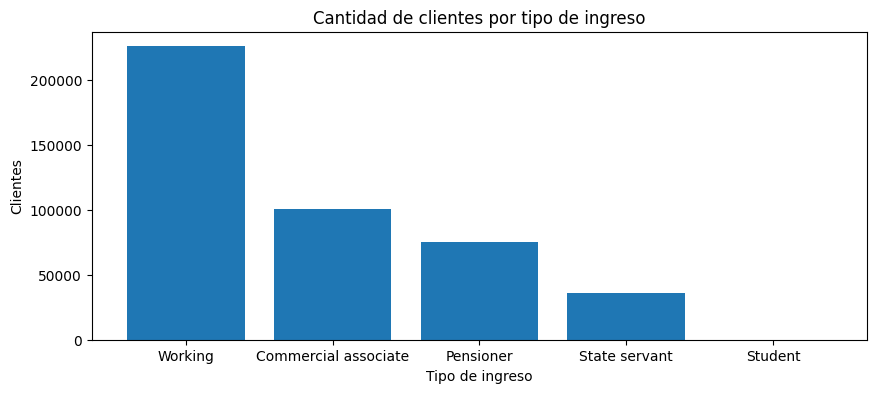

In [204]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(tipo_ing, cant_tipo_ing)
ax.set_title('Cantidad de clientes por tipo de ingreso')
ax.set_ylabel('Clientes')
ax.set_xlabel('Tipo de ingreso')
#Se observa que la mayoria de los clientes son trabajadores, y seguidos de los comerciantes y por ultimo los estudiantes
#Son mas los clientes pensionados que los trabajadores del estado

Corroboramos que la mayor cantidad de clientes tienen tipo de ingreso Working

In [205]:
working = df_tdc[df_tdc['NAME_INCOME_TYPE']=='Working'] #Trabajadores
working_auto = working[working['FLAG_OWN_CAR']=='Y'] #Trabajadores con auto
working_auto['FLAG_OWN_CAR'].count() #Cantidad de trabajadores con auto

91233

In [206]:
working_auto.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0


In [207]:
working_auto['NAME_FAMILY_STATUS'].values

array(['Civil marriage', 'Civil marriage', 'Married', ..., 'Married',
       'Married', 'Married'], dtype=object)

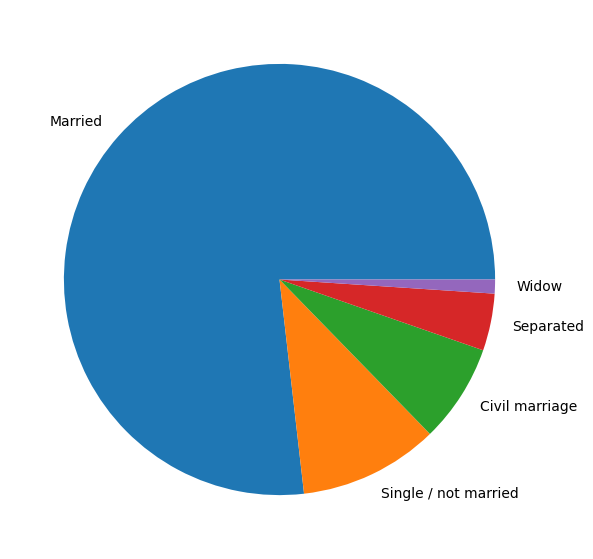

In [208]:
fig,ax = plt.subplots(figsize =(10, 7))
valores = working_auto['NAME_FAMILY_STATUS'].value_counts()
ax.pie(valores, labels = valores.index);
#Situación familiar de los clientes Trabajadores con auto. La gran mayoria están casados
#De los clientes trabajadores con auto, la menor cantidad son viudos

En este caso que la mayoría de los trabajadores que posee auto están casados

In [209]:
working_auto_married = working_auto[working_auto['NAME_FAMILY_STATUS']=='Married']
working_auto_married_1 = working_auto_married.drop(['FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'], axis=1)
working_auto_married_1.head()

,ID,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,0,112500.0,Secondary / secondary special,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
10,5008815,M,Y,0,270000.0,Higher education,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
11,5112956,M,Y,0,270000.0,Higher education,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
12,6153651,M,Y,0,270000.0,Higher education,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
19,5008825,F,N,0,130500.0,Incomplete higher,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0


In [210]:
vivienda = working_auto_married_1['NAME_HOUSING_TYPE'].value_counts()
vivienda

House / apartment      63877
With parents            2903
Municipal apartment     1486
Rented apartment         885
Office apartment         575
Co-op apartment          356
Name: NAME_HOUSING_TYPE, dtype: int64

Se puede osbervar que los clientes trabajadores, con auto y casados, en su mayoria tienen casa o departamento propio, lo cual se corrobora en el siguiente gráfico

Text(0.5, 0, 'Tipo de vivienda')

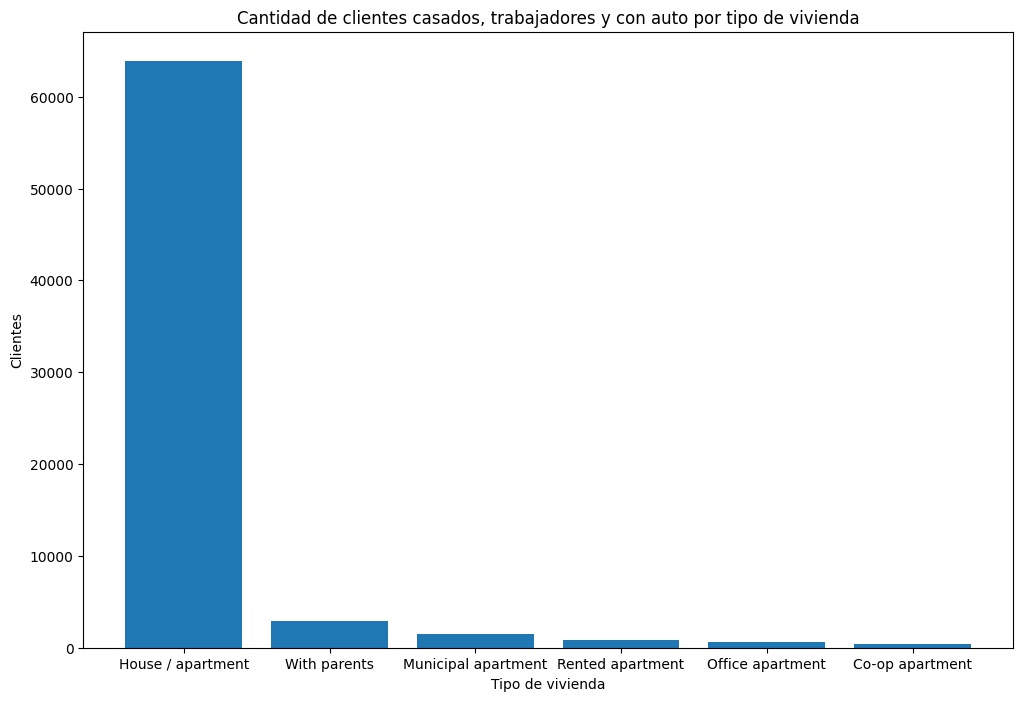

In [211]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(vivienda.index, vivienda)
ax.set_title('Cantidad de clientes casados, trabajadores y con auto por tipo de vivienda')
ax.set_ylabel('Clientes')
ax.set_xlabel('Tipo de vivienda')
#Se observa que la mayoría vive en casa o departamento

In [212]:
working_auto_single = working_auto[working_auto['NAME_FAMILY_STATUS']=='Single / not married']
working_auto_single.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,-19063,-7404,1,0,0,0,Managers,1.0
493,5009360,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,-19063,-7404,1,0,0,0,Managers,1.0
845,5009757,M,Y,N,0,270000.0,Working,Higher education,Single / not married,House / apartment,-9087,-1682,1,0,0,0,Laborers,1.0
846,5009758,M,Y,N,0,270000.0,Working,Higher education,Single / not married,House / apartment,-9087,-1682,1,0,0,0,Laborers,1.0
847,5009759,M,Y,N,0,270000.0,Working,Higher education,Single / not married,House / apartment,-9087,-1682,1,0,0,0,Laborers,1.0


<Figure size 640x480 with 0 Axes>

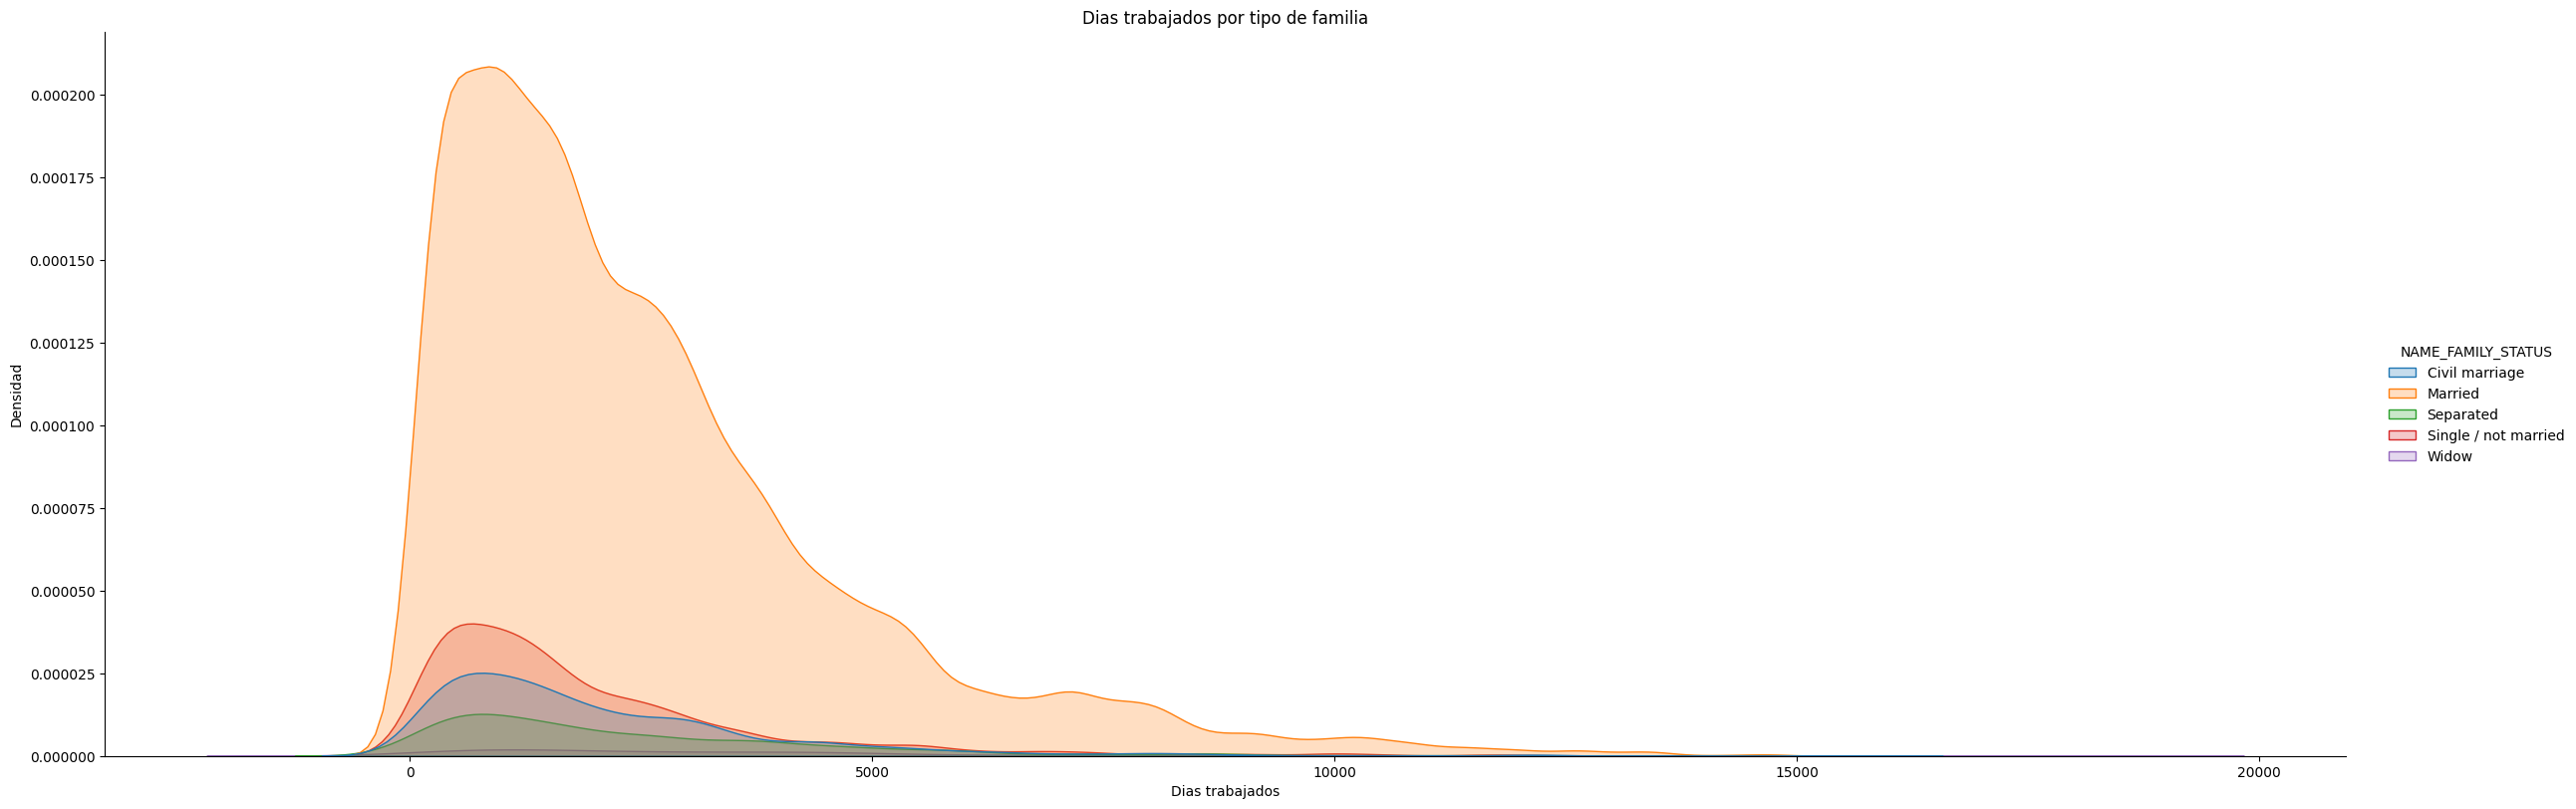

In [213]:
plt.figure()
ax = sns.displot(data = working_auto, x= df_tdc['DAYS_EMPLOYED'].abs(), hue = 'NAME_FAMILY_STATUS', kind = 'kde', fill=True,height = 8, aspect = 3);
ax.set(xlabel= 'Dias trabajados', ylabel = 'Densidad', title = 'Dias trabajados por tipo de familia');
#De los trabajadores con auto, la mayoria estan casados y son los que mas tiempo tienen trabajando
#Los separados son la minoría entre los clientes trabajadores con auto y también los que menos tiempo tienen trabajando

En el grafico anterior analizamos el estado civil de los clientes trabajadores con auto. Podemos observar que la gran mayoria son solteros.

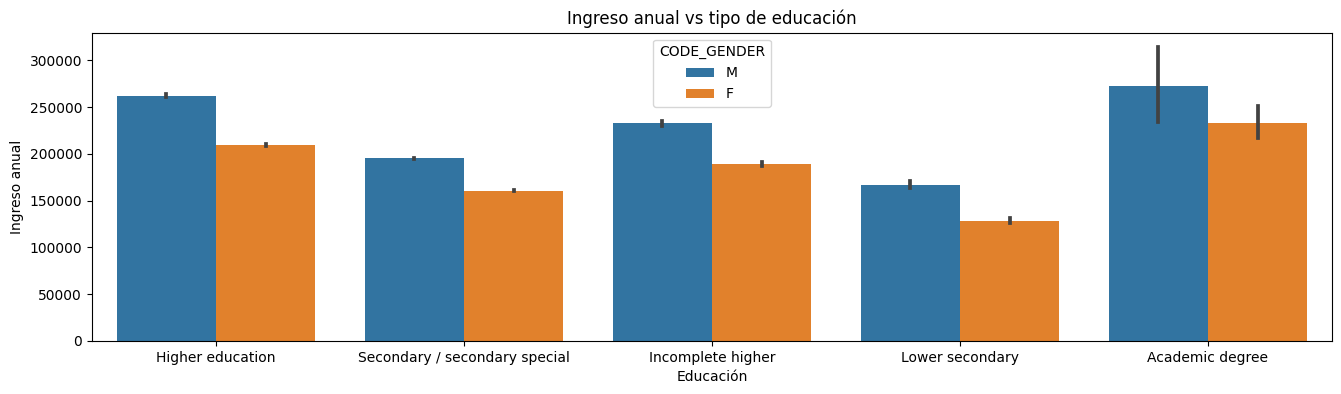

In [215]:
sns.barplot(data=df_tdc, x="NAME_EDUCATION_TYPE", y="AMT_INCOME_TOTAL", hue="CODE_GENDER");
plt.xlabel("Educación")
plt.ylabel("Ingreso anual")
plt.title("Ingreso anual vs tipo de educación")
plt.gcf().set_size_inches(16,4)
#Ingreso anual por tipo de educación y género
#Los mayores ingresos anuales con alta precisión son los de educación alta en los hombres
#Los de grado académico tienen mayor ingreso anual pero con valores desviados
#Para los clientes femeninos ocurre igual, valores mas estables los de Higher education con respecto a los de grado que tienen valores desviados

Del gráfico anterior analizamos el ingreso anual por tipo de educación, donde se observa que los ingresos mas altos son para los de grado academico y educación superior. Además se observa que los de sexo masculino tinen mas alto ingreso que los de sexo femenino

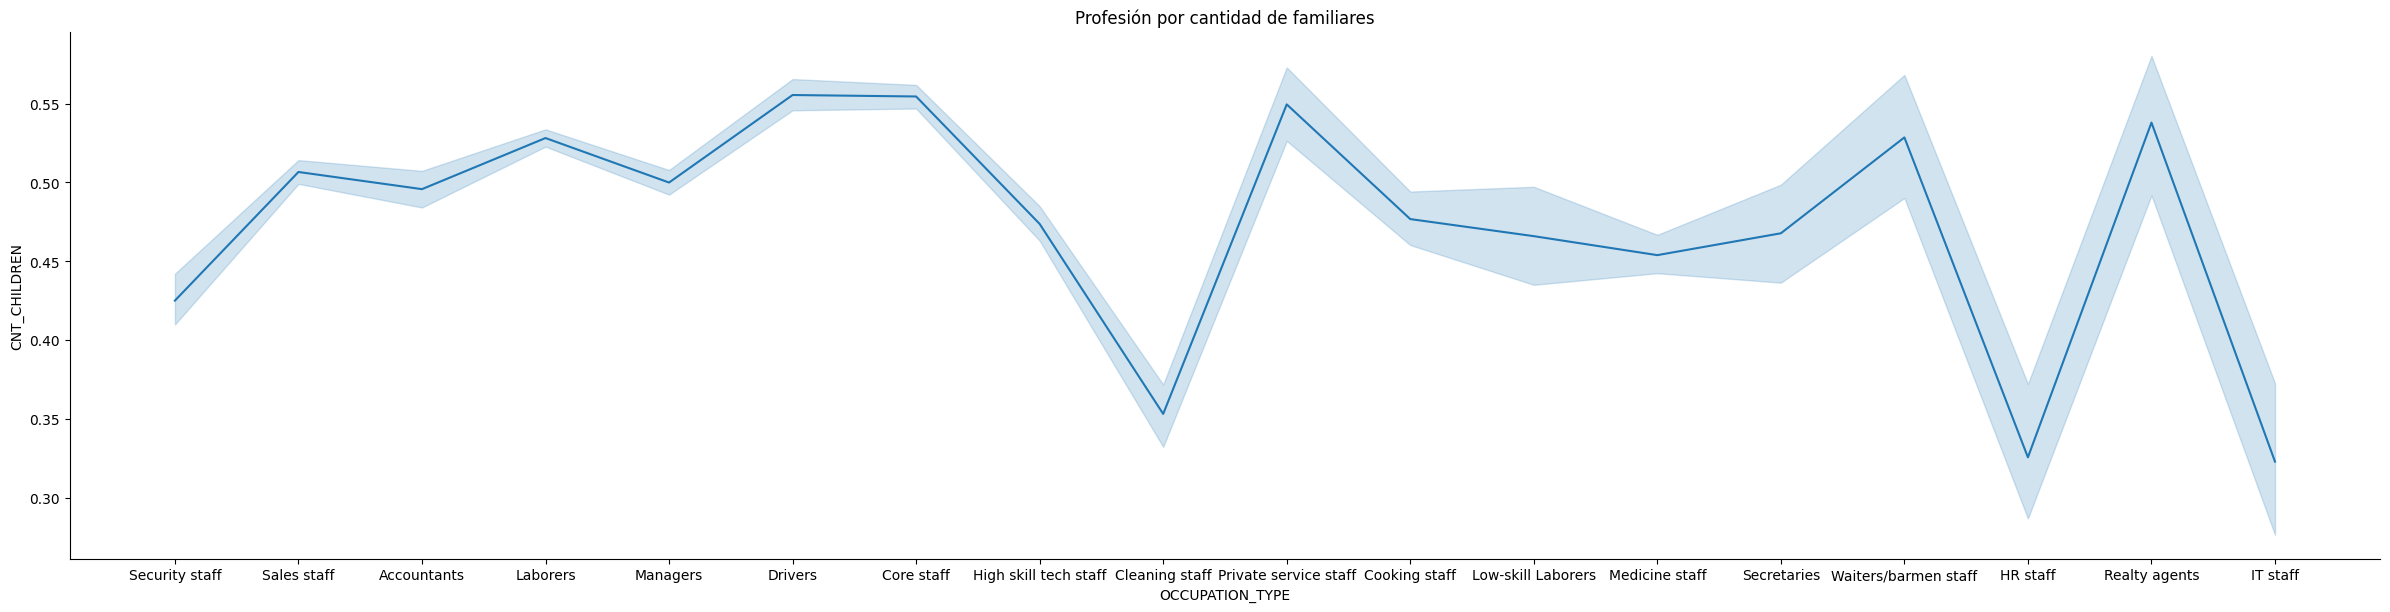

In [221]:
sns.relplot(data=df_tdc, x="OCCUPATION_TYPE", y="CNT_CHILDREN", kind="line",height = 6, aspect = 4);
ax.set(xlabel='Cantidad de familiares', ylabel='Profesión');
plt.title('Profesión por cantidad de familiares');
#Los que menos hijos tienen son el personal de HR (recursos humanos) y los de IT
#Los que mas hijos tienen en promedio son los conductores

En el gráfico anterior analizamos la cantidad de hijos por el tipo de trabajo que tienne, donde se observa que los que tienen menor cantidad de hijos los de recursos humanos y de IT, por el contrario los de mayor cantidad de hijos ne promedio son los conductores

Con base en todo lo anterior. Generaremos gráficos para ingreso anual de clientes con las siguientes caracteristicas

*   Solteros
*   Grado académico o educación superior
*   Tipo de trabajo
*   Propiedad de auto
*   Casa o departamento propio







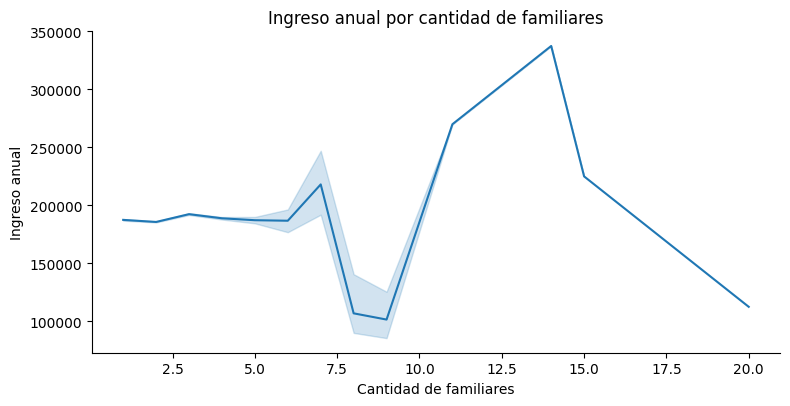

In [225]:
ax = sns.relplot(data= df_tdc, kind="line",x="CNT_FAM_MEMBERS", y="AMT_INCOME_TOTAL", height = 4, aspect = 2);
ax.set(xlabel='Cantidad de familiares', ylabel='Ingreso anual');
plt.title('Ingreso anual por cantidad de familiares');

Podemos decir que el mayor ingreso está en familias con mas de 12 miembros, y que el menor ingreso es de familias con 6 miembros aproximadamente

In [24]:
df_tdc.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [25]:
academ = df_tdc[df_tdc['NAME_EDUCATION_TYPE']=='Academic degree']
solt_academ = academ[academ['NAME_FAMILY_STATUS']=='Single / not married']
SA_auto = solt_academ[solt_academ['FLAG_OWN_CAR']=='Y']
SAA_realty = SA_auto[SA_auto['FLAG_OWN_REALTY']=='Y']
SAA_realty

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
304546,6212846,F,Y,Y,0,135000.0,Commercial associate,Academic degree,Single / not married,With parents,-10463,-274,1,0,1,0,NaN,1.0


Luego de ajustar, vemos que un solo cliente posee una propiedad, auto, esta soltero y su nivel educativo es de grado académico. Además tiene un ingreso anual de 135000. Recordando que el ingreso anual promedio es de 187524

Por otra parte, si al dataset anterior le sacamos el filtro de que posee una propiedad obtenemos el siguiente dataset


In [26]:
SA_auto

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
143202,5680551,M,Y,N,0,202500.0,Working,Academic degree,Single / not married,Rented apartment,-17384,-394,1,0,0,0,NaN,1.0
143203,5680552,M,Y,N,0,202500.0,Working,Academic degree,Single / not married,Rented apartment,-17384,-394,1,0,0,0,NaN,1.0
304546,6212846,F,Y,Y,0,135000.0,Commercial associate,Academic degree,Single / not married,With parents,-10463,-274,1,0,1,0,NaN,1.0


Acá se agregan dos clientes más, con la diferencia que tienen un ingreso anual de 202500, mayor al promedio

Para el siguiente dataset vamos a sacar el filtro de posesión de auto 

In [27]:
solt_academ.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
23209,5067710,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,-2769,1,0,0,0,NaN,2.0
23210,5067711,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,-2769,1,0,0,0,NaN,2.0
23211,5067719,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,-2769,1,0,0,0,NaN,2.0
23212,5067720,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,-2769,1,0,0,0,NaN,2.0
23213,5067721,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,-2769,1,0,0,0,NaN,2.0


Con este dataset, elaboramos una gráfica de ingreso anual y tipo de trabajo

Text(0.5, 1.0, 'Ingreso anual vs tipo de ingreso')

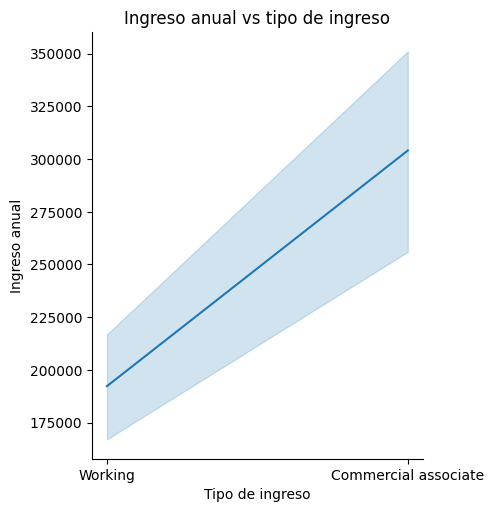

In [28]:
sns.relplot(data=solt_academ, kind="line",x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL")
plt.xlabel("Tipo de ingreso")
plt.ylabel("Ingreso anual")
plt.title("Ingreso anual vs tipo de ingreso")

Con esto observamos que un asociado comercial tiene mejor ingreso anual que un trabajador común

Finalmente, podemos decir que los mejores candidatos para recibir una tarjeta de crédito en este dataset, son los woking o commercial associate, de estado civil soltero, que poseen auto y con un rango de ingresos anual de entre 187 mil (ingreso promedio) y 30 mil

<ipython-input-29-2c1803a00f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solt_academ['DAYS_EMPLOYED'] = solt_academ['DAYS_EMPLOYED'].abs()


Text(0.5, 1.0, 'Ingreso anual vs Dias trabajados')

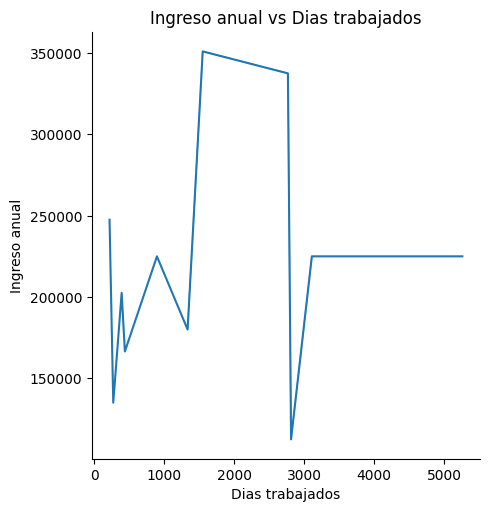

In [29]:
solt_academ['DAYS_EMPLOYED'] = solt_academ['DAYS_EMPLOYED'].abs()
sns.relplot(data=solt_academ, kind="line",x="DAYS_EMPLOYED", y="AMT_INCOME_TOTAL")
plt.xlabel("Dias trabajados")
plt.ylabel("Ingreso anual")
plt.title("Ingreso anual vs Dias trabajados")

El mayor ingreso anual se observa entre los 1500 y 2700 dias trabajados, luego hay una tendencia lineal en los ingresos a partir de los 3100 dias de trabajo

In [30]:
solt_academ.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
23209,5067710,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0
23210,5067711,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0
23211,5067719,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0
23212,5067720,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0
23213,5067721,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0


<Figure size 800x600 with 0 Axes>

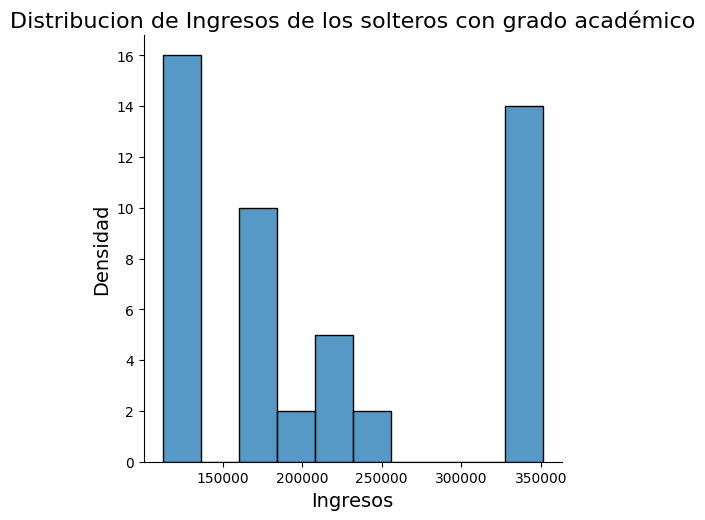

In [31]:
x = solt_academ['AMT_INCOME_TOTAL']
plt.figure(figsize=(8,6))
sns.displot(x, bins=10, kde = False)
plt.title('Distribucion de Ingresos de los solteros con grado académico', fontsize=16)
plt.xlabel('Ingresos', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

A continuación vamos a transformar variables categóricas para un mejor manejo de los datos

In [32]:
dummy_ingreso_solt_academ = pd.get_dummies(solt_academ['NAME_INCOME_TYPE'], prefix = 'Ingreso')
solt_academ_ing = pd.concat([solt_academ,dummy_ingreso_solt_academ], axis = 1)
solt_academ_ing.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Ingreso_Commercial associate,Ingreso_Working
23209,5067710,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0,0,1
23210,5067711,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0,0,1
23211,5067719,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0,0,1
23212,5067720,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0,0,1
23213,5067721,F,N,Y,1,337500.0,Working,Academic degree,Single / not married,House / apartment,-12555,2769,1,0,0,0,NaN,2.0,0,1


Transformamos todos los datos categóricos y los agregamos al dataset, a la vez que eliminamos las anteriores columnas

In [33]:
dummy_gender = pd.get_dummies(df_tdc['CODE_GENDER'], prefix = 'Genero')
df_tdc = pd.concat([df_tdc,dummy_gender], axis = 1)

In [34]:
dummy_realty = pd.get_dummies(df_tdc['FLAG_OWN_REALTY'], prefix = 'Propiedad')
df_tdc = pd.concat([df_tdc,dummy_realty], axis = 1)

In [35]:
dummy_ingreso = pd.get_dummies(df_tdc['NAME_INCOME_TYPE'], prefix = 'Ingreso')
df_tdc = pd.concat([df_tdc,dummy_ingreso], axis = 1)

In [36]:
dummy_estado_civil = pd.get_dummies(df_tdc['NAME_FAMILY_STATUS'], prefix = 'Estado_civil')
df_tdc = pd.concat([df_tdc,dummy_estado_civil], axis = 1)

In [37]:
dummy_educacion = pd.get_dummies(df_tdc['NAME_EDUCATION_TYPE'], prefix = 'Educacion')
df_tdc = pd.concat([df_tdc,dummy_educacion], axis = 1)

In [38]:
dummy_vivienda = pd.get_dummies(df_tdc['NAME_HOUSING_TYPE'], prefix = 'Vivienda')
df_tdc = pd.concat([df_tdc,dummy_vivienda], axis = 1)

In [39]:
dummy_ocupacion = pd.get_dummies(df_tdc['OCCUPATION_TYPE'], prefix = 'Ocupacion')
df_tdc = pd.concat([df_tdc,dummy_ocupacion], axis = 1)

In [40]:
dummy_df_tdc = pd.get_dummies(df_tdc['FLAG_OWN_CAR'], prefix = 'Auto')
df_tdc = pd.concat([df_tdc,dummy_df_tdc], axis = 1)
df_tdc.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,Ocupacion_Managers,Ocupacion_Medicine staff,Ocupacion_Private service staff,Ocupacion_Realty agents,Ocupacion_Sales staff,Ocupacion_Secretaries,Ocupacion_Security staff,Ocupacion_Waiters/barmen staff,Auto_N,Auto_Y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,0,0,0,0,0,0,0,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,0,0,0,1,0,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,1,0,0,0,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,0,0,1,0,0,0,1,0


In [41]:
df_tdc.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], axis = 1, inplace=True)

In [42]:
df_tdc.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,Ocupacion_Managers,Ocupacion_Medicine staff,Ocupacion_Private service staff,Ocupacion_Realty agents,Ocupacion_Sales staff,Ocupacion_Secretaries,Ocupacion_Security staff,Ocupacion_Waiters/barmen staff,Auto_N,Auto_Y
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,1,0,0,1
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,1,0,0,0,1,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,1,0,0,0,1,0


A continuación vamos a eliminar campos redundantes para las variables categóricas que poseían dos categorias

In [43]:
df_tdc.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'Genero_F', 'Genero_M', 'Propiedad_N', 'Propiedad_Y',
       'Ingreso_Commercial associate', 'Ingreso_Pensioner',
       'Ingreso_State servant', 'Ingreso_Student', 'Ingreso_Working',
       'Estado_civil_Civil marriage', 'Estado_civil_Married',
       'Estado_civil_Separated', 'Estado_civil_Single / not married',
       'Estado_civil_Widow', 'Educacion_Academic degree',
       'Educacion_Higher education', 'Educacion_Incomplete higher',
       'Educacion_Lower secondary', 'Educacion_Secondary / secondary special',
       'Vivienda_Co-op apartment', 'Vivienda_House / apartment',
       'Vivienda_Municipal apartment', 'Vivienda_Office apartment',
       'Vivienda_Rented apartment', 'Vivienda_With parents',
       'Ocupacion_Accountants', 'Ocupacion_Cleaning staff',
       'Ocupacion_Cooking staff', 'Ocupacion_Core s

In [44]:
df_tdc.drop(['Genero_M','Propiedad_N','Ingreso_Student','Estado_civil_Married','Educacion_Secondary / secondary special',
             'Propiedad_N','Vivienda_With parents','Ocupacion_HR staff','Auto_N'], axis = 1, inplace=True)

Definimos variables para hacer selección

In [45]:
x = df_tdc.drop(['Auto_Y'], axis=1)
y = df_tdc['Auto_Y']

Haremos Feature selection, forward selection

In [46]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [47]:
forward_selection(x,y)

<ipython-input-46-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-46-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-46-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-46-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-46-a6

['Genero_F',
 'Ocupacion_Managers',
 'AMT_INCOME_TOTAL',
 'CNT_FAM_MEMBERS',
 'DAYS_EMPLOYED',
 'Ocupacion_Drivers',
 'Educacion_Higher education',
 'FLAG_MOBIL',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'Estado_civil_Civil marriage',
 'Ocupacion_Accountants',
 'Vivienda_House / apartment',
 'FLAG_WORK_PHONE',
 'Ocupacion_Cleaning staff',
 'Ocupacion_Low-skill Laborers',
 'Ocupacion_Private service staff',
 'Ocupacion_High skill tech staff',
 'Ocupacion_Waiters/barmen staff',
 'Vivienda_Co-op apartment',
 'Ingreso_State servant',
 'Ocupacion_Laborers',
 'Ocupacion_Cooking staff',
 'Propiedad_Y',
 'Vivienda_Municipal apartment',
 'Vivienda_Rented apartment',
 'Educacion_Lower secondary',
 'FLAG_EMAIL',
 'FLAG_PHONE',
 'Ocupacion_IT staff',
 'Vivienda_Office apartment',
 'Estado_civil_Single / not married',
 'Estado_civil_Widow',
 'Estado_civil_Separated',
 'Educacion_Incomplete higher']

In [48]:
df_tdc

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,Ocupacion_Low-skill Laborers,Ocupacion_Managers,Ocupacion_Medicine staff,Ocupacion_Private service staff,Ocupacion_Realty agents,Ocupacion_Sales staff,Ocupacion_Secretaries,Ocupacion_Security staff,Ocupacion_Waiters/barmen staff,Auto_Y
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,0,0,0,0,0,0,0,1,0,1
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,1,0,0,0,0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,135000.0,-22717,365243,1,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
438553,6840222,0,103500.0,-15939,-3007,1,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
438554,6841878,0,54000.0,-8169,-372,1,1,0,0,1.0,...,0,0,0,0,0,1,0,0,0,0
438555,6842765,0,72000.0,-21673,365243,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0


Generamos Dataset con las columnas seleccionadas 

In [49]:
df_tdc_feature = df_tdc[['ID',
 'Ingreso_Commercial associate',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'Estado_civil_Separated',
 'DAYS_BIRTH',
 'Genero_F',
 'FLAG_MOBIL',
 'Educacion_Higher education',
 'CNT_FAM_MEMBERS',
 'Ocupacion_Drivers',
 'Ocupacion_Managers',
 'Estado_civil_Civil marriage',
 'Ocupacion_Accountants',
 'Vivienda_House / apartment',
 'Ingreso_Working',
 'FLAG_WORK_PHONE',
 'Ocupacion_Cleaning staff',
 'Ocupacion_Low-skill Laborers',
 'Ocupacion_High skill tech staff',
 'Ocupacion_Private service staff',
 'Ingreso_State servant',
 'Ocupacion_Waiters/barmen staff',
 'Vivienda_Co-op apartment',
 'Ocupacion_Laborers',
 'Ocupacion_Cooking staff',
 'Propiedad_Y',
 'Vivienda_Municipal apartment',
 'Vivienda_Rented apartment',
 'Educacion_Lower secondary',
 'FLAG_EMAIL',
 'FLAG_PHONE',
 'Ocupacion_IT staff',
 'Vivienda_Office apartment',
 'Educacion_Incomplete higher','Auto_Y']]

In [50]:
df_tdc_feature.head()

,ID,Ingreso_Commercial associate,CNT_CHILDREN,AMT_INCOME_TOTAL,Estado_civil_Separated,DAYS_BIRTH,Genero_F,FLAG_MOBIL,Educacion_Higher education,CNT_FAM_MEMBERS,...,Propiedad_Y,Vivienda_Municipal apartment,Vivienda_Rented apartment,Educacion_Lower secondary,FLAG_EMAIL,FLAG_PHONE,Ocupacion_IT staff,Vivienda_Office apartment,Educacion_Incomplete higher,Auto_Y
0,5008804,0,0,427500.0,0,-12005,0,1,1,2.0,...,1,0,1,0,0,0,0,0,0,1
1,5008805,0,0,427500.0,0,-12005,0,1,1,2.0,...,1,0,1,0,0,0,0,0,0,1
2,5008806,0,0,112500.0,0,-21474,0,1,0,2.0,...,1,0,0,0,0,0,0,0,0,1
3,5008808,1,0,270000.0,0,-19110,1,1,0,1.0,...,1,0,0,0,1,1,0,0,0,0
4,5008809,1,0,270000.0,0,-19110,1,1,0,1.0,...,1,0,0,0,1,1,0,0,0,0


Definimos valores de variables incluyendo la objetivo

In [51]:
x = df_tdc_feature.drop(['Auto_Y'], axis=1)
y = df_tdc_feature['Auto_Y']

Evaluamos con modelo XGBoost Classifier

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
predicted_y = model.predict(x_test)
predicted_y

array([1, 0, 0, ..., 1, 1, 1])

In [53]:
print(classification_report(y_test, predicted_y))
print(confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     96503
           1       0.70      0.56      0.63     56992

    accuracy                           0.75    153495
   macro avg       0.74      0.71      0.72    153495
weighted avg       0.74      0.75      0.74    153495

[[82808 13695]
 [24861 32131]]


Se observa una precisión de negativos del 77% y para positivos del 70%


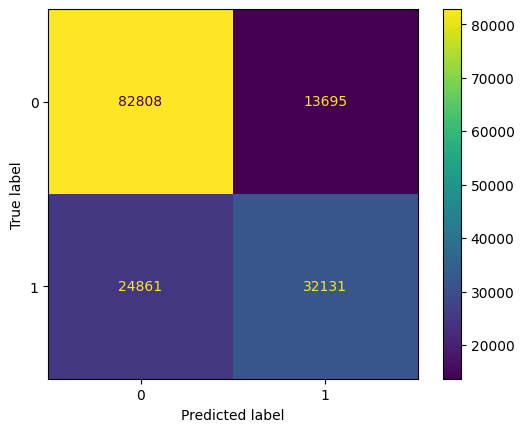

In [54]:
cm = confusion_matrix(y_test, predicted_y)
ConfusionMatrixDisplay(cm).plot();

El modelo predice 32131 positivos que eran positivos, predice 82808 negativos que resultaron negativos.



Con esto, podemos decir que el modelo se ajusta bien a los datos, ya que tiene una precisión que evita los comunes problemas en estos casos, con lo cual, brindará resultados apropiados a la hora de predecir la información requerida.

En este caso, con el modelo escogido vamos a poder seleccionar a cuales clientes denegar el crédito y a cuales no. Se le entregarían al modelo los datos de los clientes y el seleccionará los apropiados para acceder al crédito, teniendo en cuenta los multiples factores que se necesitan para mantener el prestamo en pie.

Esto nos ayudará, ya que nos permite una selección de clientes donde se proyecta que pagarán la deuda, reduciendo así el riesgo de pérdida del banco. Además de ser más rápido a la hora de elegir un cliente, que cualquier otro método investigativo manual que pueda existir.

Por estos beneficios y por la mejora que representan para el banco y sus finanzas, es por lo cual este modelo al ajustarse a los datos de clientes nos va a permitir multiplicar las ganancias por concepto de prestamos.



A continuación importaremos un dataset con datos relaconados, que nos servirá para enriquecer el nuestro. Lo vamos a descargar desde una API de kaggle

Instalamos la libreria de kaggle

In [55]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cargamos la API Key de kaggle e importamos la libreria

In [57]:
import kaggle

Descargamos la API

In [58]:
! kaggle competitions download Home-Credit-Default-Risk

 98% 673M/688M [00:09<00:00, 79.7MB/s]
100% 688M/688M [00:09<00:00, 77.8MB/s]


Importamos libreria para manejar archivos comprimidos en zip y extraemos los archivos

In [59]:
import zipfile

with zipfile.ZipFile('/content/Home-Credit-Default-Risk.zip', 'r') as zipref:
  zipref.extractall()

Trabajaremos con el dataset llamado application_train.csv

In [60]:
df_application = pd.read_csv('/content/application_train.csv')
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [62]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_application.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

De las variables mas interesantes tenemos, el límite de credito, gasto anual, el precio de los bienes, departemento promedio, medidas del departamento, los dias que tiene registrado el cliente, los dìas desde que cambió su teléfono y el credito solicitado anual

AMT_CREDIT

AMT_ANNUITY

AMT_GOODS_PRICE

APARTMENTS_AVG

APARTMENTS_MEDI

DAYS_REGISTRATION

DAYS_LAST_PHONE_CHANGE

AMT_REQ_CREDIT_BUREAU_YEAR

Creamos un dataset con los campos que vamos a unir al dataset df_tdc_feature

In [130]:
df_app = df_application[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','APARTMENTS_AVG','APARTMENTS_MEDI','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR']]
df_app.head()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,APARTMENTS_AVG,APARTMENTS_MEDI,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,406597.5,24700.5,351000.0,0.0247,0.0250,-3648.0,-1134.0,1.0
1,1293502.5,35698.5,1129500.0,0.0959,0.0968,-1186.0,-828.0,0.0
2,135000.0,6750.0,135000.0,NaN,NaN,-4260.0,-815.0,0.0
3,312682.5,29686.5,297000.0,NaN,NaN,-9833.0,-617.0,NaN
4,513000.0,21865.5,513000.0,NaN,NaN,-4311.0,-1106.0,0.0


In [190]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_CREDIT                  307511 non-null  float64
 1   AMT_ANNUITY                 307499 non-null  float64
 2   AMT_GOODS_PRICE             307233 non-null  float64
 3   APARTMENTS_AVG              151450 non-null  float64
 4   APARTMENTS_MEDI             151450 non-null  float64
 5   DAYS_REGISTRATION           307511 non-null  float64
 6   DAYS_LAST_PHONE_CHANGE      307510 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(8)
memory usage: 18.8 MB


In [160]:
df_2 = df_tdc_feature.join(df_app, how = 'left')

In [161]:
df_2

,ID,Ingreso_Commercial associate,CNT_CHILDREN,AMT_INCOME_TOTAL,Estado_civil_Separated,DAYS_BIRTH,Genero_F,FLAG_MOBIL,Educacion_Higher education,CNT_FAM_MEMBERS,...,Educacion_Incomplete higher,Auto_Y,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,APARTMENTS_AVG,APARTMENTS_MEDI,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,5008804,0,0,427500.0,0,-12005,0,1,1,2.0,...,0,1,406597.5,24700.5,351000.0,0.0247,0.0250,-3648.0,-1134.0,1.0
1,5008805,0,0,427500.0,0,-12005,0,1,1,2.0,...,0,1,1293502.5,35698.5,1129500.0,0.0959,0.0968,-1186.0,-828.0,0.0
2,5008806,0,0,112500.0,0,-21474,0,1,0,2.0,...,0,1,135000.0,6750.0,135000.0,NaN,NaN,-4260.0,-815.0,0.0
3,5008808,1,0,270000.0,0,-19110,1,1,0,1.0,...,0,0,312682.5,29686.5,297000.0,NaN,NaN,-9833.0,-617.0,NaN
4,5008809,1,0,270000.0,0,-19110,1,1,0,1.0,...,0,0,513000.0,21865.5,513000.0,NaN,NaN,-4311.0,-1106.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,135000.0,1,-22717,0,1,0,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438553,6840222,0,0,103500.0,0,-15939,1,1,0,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438554,6841878,1,0,54000.0,0,-8169,1,1,1,1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438555,6842765,0,0,72000.0,0,-21673,1,1,0,2.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Logramos enriquecer nuestro dataset con datos útiles para el proceso 

In [175]:
df_2.dropna(inplace=True)
df_2

,ID,Ingreso_Commercial associate,CNT_CHILDREN,AMT_INCOME_TOTAL,Estado_civil_Separated,DAYS_BIRTH,Genero_F,FLAG_MOBIL,Educacion_Higher education,CNT_FAM_MEMBERS,...,Educacion_Incomplete higher,Auto_Y,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,APARTMENTS_AVG,APARTMENTS_MEDI,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,5008804,0,0,427500.0,0,-12005,0,1,1,2.0,...,0,1,406597.5,24700.5,351000.0,0.0247,0.0250,-3648.0,-1134.0,1.0
1,5008805,0,0,427500.0,0,-12005,0,1,1,2.0,...,0,1,1293502.5,35698.5,1129500.0,0.0959,0.0968,-1186.0,-828.0,0.0
12,6153651,0,0,270000.0,0,-16872,0,1,1,2.0,...,0,1,80865.0,5881.5,67500.0,0.0825,0.0833,-311.0,-2370.0,0.0
13,5008819,1,0,135000.0,0,-17778,0,1,0,2.0,...,0,1,918468.0,28966.5,697500.0,0.1474,0.1489,-643.0,-4.0,1.0
18,5008824,1,0,135000.0,0,-17778,0,1,0,2.0,...,0,1,157500.0,7875.0,157500.0,0.0278,0.0281,-8751.0,-239.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,6228999,0,0,157500.0,0,-18021,1,1,0,2.0,...,0,0,1303812.0,35982.0,1138500.0,0.1299,0.1312,-157.0,-1459.0,5.0
307505,6229005,0,0,130500.0,0,-9852,1,1,0,2.0,...,0,1,225000.0,22050.0,225000.0,0.2206,0.2228,-7369.0,0.0,0.0
307508,6229012,0,1,157500.0,0,-11523,1,1,0,3.0,...,0,0,677664.0,29979.0,585000.0,0.1031,0.1041,-6737.0,-1909.0,1.0
307509,6229015,0,1,157500.0,0,-11523,1,1,0,3.0,...,0,0,370107.0,20205.0,319500.0,0.0124,0.0125,-2562.0,-322.0,0.0


Con este dataset, evaluamos de nuevo el modelo aplicado

In [176]:
x = df_2.drop(['Auto_Y'], axis=1)
y = df_2['Auto_Y']

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
predicted_y = model.predict(x_test)
predicted_y

array([1, 0, 0, ..., 0, 1, 0])

In [178]:
print(classification_report(y_test, predicted_y))
print(confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     29047
           1       0.70      0.55      0.62     17257

    accuracy                           0.75     46304
   macro avg       0.73      0.71      0.71     46304
weighted avg       0.74      0.75      0.74     46304

[[24944  4103]
 [ 7703  9554]]


En este caso bajó un punto la precisión y el recall, ajustamos entonces los datos de entrenamiento del modelo y probamos de nuevo

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.45)
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
predicted_y = model.predict(x_test)
predicted_y

array([0, 0, 0, ..., 0, 0, 0])

In [187]:
print(classification_report(y_test, predicted_y))
print(confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     37442
           1       0.70      0.53      0.60     22092

    accuracy                           0.74     59534
   macro avg       0.73      0.70      0.71     59534
weighted avg       0.74      0.74      0.73     59534

[[32333  5109]
 [10335 11757]]


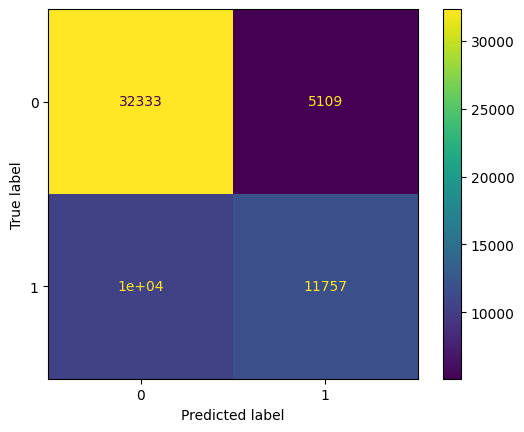

In [188]:
cm = confusion_matrix(y_test, predicted_y)
ConfusionMatrixDisplay(cm).plot();

En este caso, la precisión se mantiene. Y tenemos una exhaustividad del 86% para decidir sobre valores negativos


Con esto, decimos que el modelo se ajusta a los datos integrando los nuevos datos apoyando la decisión sobre los valores negativos, lo cual tiene mucho significado porque vamos a enfocar el uso del modelo en predecir los clientes que no se les aprueba el crédito en lugar de enfocar a los que se aprueba. Esto para aprovechar la exhaustividad del modelo y reducir el riesgo a largo plazo de clientes con altas deudas, lo cual sería negativo para el banco

Con la integración de los datos tenemos más variables a tomar en cuenta por el modelo matemático. El modelo igualmente está bien entrenado y mantiene su precisión con un pequeño ajuste de los datos de entrenamiento 

La precisión obtenida es significativa debido a que manejamos gran cantidad de datos categóricos. 